In [1]:
import pandas as pd
import numpy as np

In [2]:
# df1 = pd.read_csv('./dataset/cwurData.csv')
# df2 = pd.read_csv('./dataset/education_expenditure_supplementary_data.csv')
# df3 = pd.read_csv('./dataset/educational_attainment_supplementary_data.csv')
times_data = pd.read_csv('./dataset/timesData.csv')
# school_country = pd.read_csv('./dataset/school_and_country_table.csv')
# shanghai_data = pd.read_csv('./dataset/shanghaiData.csv')

# print(df1.info(), "\n")
# print(df2.info(), "\n")
# print(df3.info(), "\n")
print(times_data.info(), "\n")
# print(school_country.info(), "\n")
# print(shanghai_data.info(), "\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [3]:
times_data = times_data[['world_rank', 'year', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio']]

Universitas mana yang menempati peringkat 10 teratas dunia?

In [4]:
# times_data["world_rank"] = (
#     times_data["world_rank"]
#     .astype(str)               # ubah dulu ke string
#     .str.extract("(\d+)")      # ambil angka saja
#     .astype("Int64")             # ubah ke float/int
# )

# times_data.sort_values(["year", "world_rank"], ascending=[False, True])

In [5]:
# # Get top 3 universities for each year
# times_data.sort_values(['year', 'world_rank']).groupby('year').head(3)

top10_each_year = times_data.groupby('year')
top10_each_year.head(10)

,world_rank,year,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio
0,1,2011,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN
1,2,2011,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67
2,3,2011,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63
3,4,2011,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58
4,5,2011,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55
5,6,2011,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54
6,6,2011,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54
7,8,2011,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50
8,9,2011,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63
9,10,2011,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50


Negara mana yang memiliki jumlah universitas terbanyak yang masuk dalam ranking

In [6]:
top_country_has_renked_univ = top10_each_year.head(50)
# top_country_has_renked_univ.groupby(['year', 'country']).size().unstack(fill_value=0)
top_country_has_renked_univ.country.value_counts()

United States of America    170
United Kingdom               40
Canada                       18
Switzerland                  12
Australia                    11
China                         9
Hong Kong                     7
Germany                       7
Japan                         6
Singapore                     6
Sweden                        6
South Korea                   4
France                        2
Belgium                       1
Netherlands                   1
Name: country, dtype: int64

Berapa rata-rata skor total (overall score) universitas di setiap negara

In [7]:
score = times_data.copy()
score["total_score"] = score.total_score.replace("-", np.nan).astype("float")
avg_score = score.groupby(["year", "country"]).total_score.mean().fillna(0)

def fill_score(row):
    if pd.isna(row["total_score"]):
        try:
            return avg_score.loc[(row["year"], row["country"])]
        except KeyError:
            return np.nan
    return row["total_score"]

score["total_score"] = score.apply(fill_score, axis=1)
overall_score = score.groupby(['year', 'country']).total_score.mean().unstack(fill_value=0)
overall_score.mean().sort_values(ascending=False)


country
Singapore                   65.600000
United States of America    64.605157
China                       62.916667
Canada                      61.099504
Switzerland                 61.049603
                              ...    
Malaysia                     0.000000
Mexico                       0.000000
Morocco                      0.000000
Nigeria                      0.000000
Unted Kingdom                0.000000
Length: 72, dtype: float64

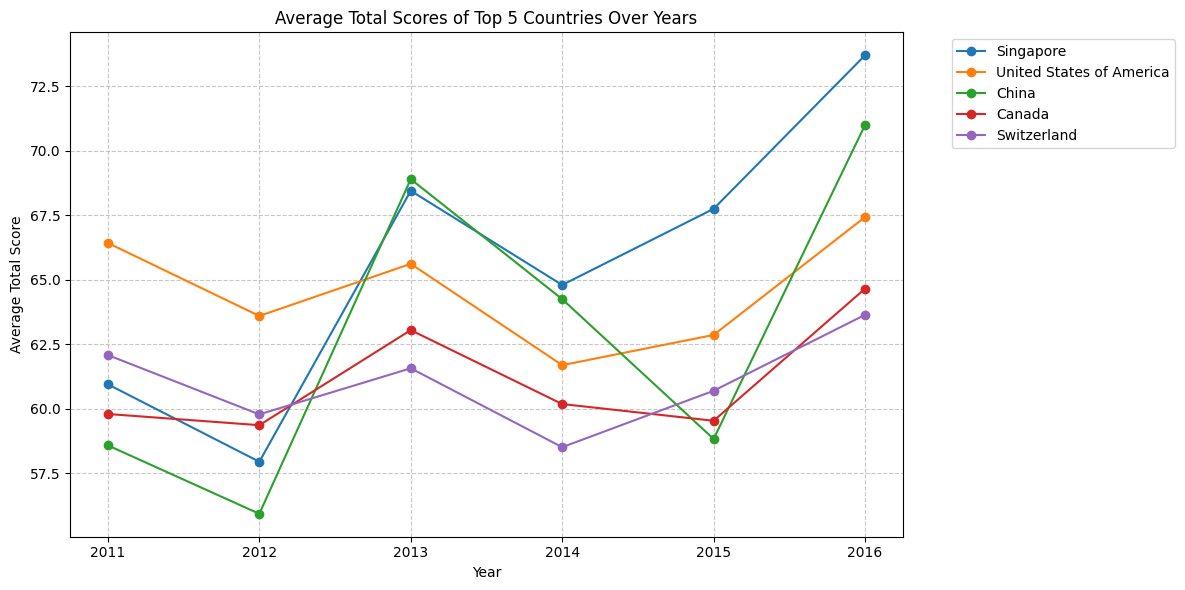

In [8]:
import matplotlib.pyplot as plt

# Select top 5 countries based on their average scores
top_countries = overall_score.mean().sort_values(ascending=False)[:5].index

# Create line plot for top 5 countries
plt.figure(figsize=(12, 6))
for country in top_countries:
    plt.plot(overall_score.index, overall_score[country], marker='o', label=country)

plt.title('Average Total Scores of Top 5 Countries Over Years')
plt.xlabel('Year')
plt.ylabel('Average Total Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

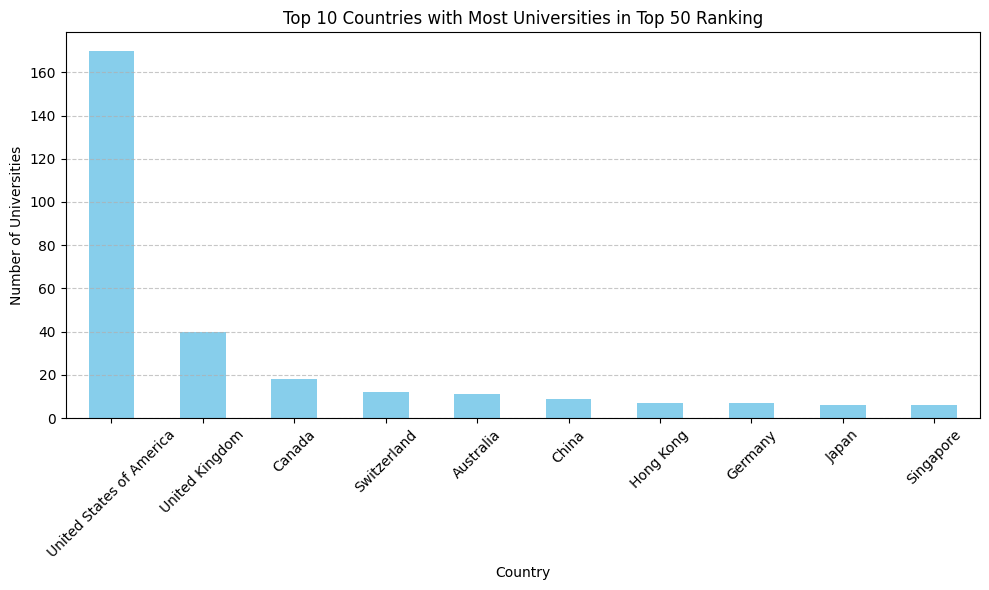

In [9]:
# top 10 countries with most universities in top 50 ranking
top_country_has_renked_univ.country.value_counts().head(10)
plt.figure(figsize=(10, 6))
top_country_has_renked_univ.country.value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Most Universities in Top 50 Ranking')
plt.xlabel('Country')
plt.ylabel('Number of Universities')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
